# Ultramarathon results 

## Abstract

In this notebook, we will dig deeper into some individual ultramarathon results. The data available for us was provided by the organizers of this event. It consists of data recorded on the events from 2008 to 2020. 

In [399]:
import pandas as pd
import numpy as np
import seaborn as sns

local_path = '/Users/csizi/Development/marathon_statistics/dataset/csv/bszm_2008_2020/'

bszm = pd.read_csv(local_path + 'bszm.csv', encoding = "utf8", 
                    sep=';', header=0)

bszm

,Placement,Name,Born,Category,Country,Team,City,Gender,Number,Category/Placement,...,3.day/2.time,3.day/3.time,3.day/sum,4.day/1.time,4.day/2.time,4.day/3.time,4.day/sum,Result,Ran km,event_year
0,1.0,Beda Szabolcs,1977,F3,HUN,ELTE SE Sashegyi gepárdok,Budapest,F,484,F3 / 1,...,1:09:42,0:51:30,2:53:54,1:04:01,1:22:26,1:02:24,3:28:51,13:02:08,196.0,2020
1,2.0,Bódis Tamás,1988,F1,HUN,ELTE SE Sashegyi gepárdok,Budapest,F,479,F1 / 1,...,1:07:40,0:51:25,2:48:22,1:01:41,1:20:17,1:02:09,3:24:07,13:06:48,196.0,2020
2,3.0,"Theisinger, Wolfgang",1982,F2,GER,RC Abschnitt Mitte,Regenstauf,F,511,F2 / 1,...,1:14:10,0:54:18,3:04:38,1:09:23,1:28:44,1:05:47,3:43:54,14:05:35,196.0,2020
3,4.0,Strifler Attila,1986,F1,HUN,NaN,Gyula,F,407,F1 / 2,...,1:14:13,0:55:24,3:05:44,1:09:40,1:28:46,1:07:32,3:45:58,14:22:47,196.0,2020
4,5.0,Szedlák Csaba,1978,F3,HUN,Vitalitás SE,Budapest,F,449,F3 / 2,...,1:17:00,1:00:59,3:17:03,1:11:29,1:31:19,1:10:47,3:53:35,14:42:39,196.0,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2505,46.0,Kollár Zoltán,1965,NaN,HUN,NaN,Budapest,F,55,28 (F/3),...,1:58:21,1:36:56,5:07:13,1:52:37,2:09:01,2:11:43,6:13:21,23:33:51,0.0,2008
2506,5.0,Országné Faragó Éva,1966,NaN,HUN,Szondi SE,Kecskemét,N,32,3 (N/3),...,2:28:55,1:58:12,5:56:09,1:56:29,2:33:47,2:23:50,6:54:06,23:39:51,0.0,2008
2507,47.0,Molnár Attila,1963,NaN,HUN,NaN,Oroszlány,F,45,29 (F/3),...,2:08:12,1:50:44,5:27:42,1:51:24,2:24:39,2:14:20,6:30:23,23:45:41,0.0,2008
2508,6.0,Hack Zsanett,1984,NaN,HUN,NaN,Nyergesújfalu,N,27,1 (N/1),...,2:21:18,1:53:07,5:38:19,1:50:16,2:24:51,2:34:05,6:49:12,1:0:19:15,0.0,2008


In [400]:
bszm['Placement'] = bszm['Placement'].astype(str) 
bszm['Placement'] = bszm['Placement'].replace('nan', '999')
bszm['Placement'] = bszm['Placement'].astype(float)
#bszm['Gender'] = np.where(bszm['Gender'] == 'F', 'M', bszm['Gender'])
#bszm['Gender'] = np.where(bszm['Gender'] == 'N', 'F', bszm['Gender'])

bszm['Gender'] = bszm['Gender'].replace('F', 'M')
bszm['Gender'] = bszm['Gender'].replace('N', 'F')



In [401]:
bszm['finished'] = np.where(bszm['Placement'] > 900, False, True)
bszm[250:].head(25)

,Placement,Name,Born,Category,Country,Team,City,Gender,Number,Category/Placement,...,3.day/3.time,3.day/sum,4.day/1.time,4.day/2.time,4.day/3.time,4.day/sum,Result,Ran km,event_year,finished
250,200.0,Dobó Szilveszter,1974,F3,HUN,NaN,Domaszék,M,268,F3 / 92,...,1:48:10,5:51:16,2:12:01,NaN,5:12:06,7:24:07,1:1:31:30,196.0,2020,True
251,52.0,Szényi Sarolta,1982,N2,HUN,Sashegyi Gepárdok,Szentendre,F,403,N2 / 34,...,1:47:03,5:51:00,2:07:32,3:02:01,2:06:20,7:15:53,1:1:45:43.000,196.0,2020,True
252,201.0,"Petroczki, Geza Jozef",1962,F4,ROM,Ipse,Budapest,M,445,F4 / 46,...,1:48:22,5:51:55,2:02:05,2:52:50,2:06:38,7:01:33,1:1:49:19,196.0,2020,True
253,202.0,Dely Zsolt,1972,F3,HUN,NaN,Enying,M,291,F3 / 93,...,1:55:32,6:04:36,2:04:26,2:51:59,2:16:08,7:12:33,1:2:13:39,196.0,2020,True
254,203.0,Demkó Gábor,1973,F3,HUN,Monorierdei Szabadidősport,Monorierdő,M,105,F3 / 94,...,1:44:01,5:55:39,2:00:31,2:52:56,2:19:14,7:12:41,1:2:37:07,196.0,2020,True
255,204.0,"Bluecher, Tord",1958,F5,SWE,NaN,Storaa,M,564,F5 / 10,...,1:58:23,6:16:35,2:16:11,3:01:55,2:12:12,7:30:18,1:2:52:58,196.0,2020,True
256,999.0,Tóth Iván Csaba,1974,F3,HUN,Fót SE Atlétika,Fót,M,430,NaN,...,3:30:18,5:03:50,2:01:41,2:25:53,1:49:13,6:16:47,4:3:59:59,143.0,2020,False
257,999.0,Toldi Péter,1981,F2,HUN,NaN,Szeged,M,418,NaN,...,NaN,4:3:59:59,NaN,NaN,NaN,4:3:59:59,4:3:59:59,101.0,2020,False
258,999.0,Szilasy Tibor,1973,F3,HUN,Kistarcsai VRSC,Budapest,M,452,NaN,...,3:38:33,5:07:45,NaN,NaN,NaN,4:3:59:59,4:3:59:59,145.0,2020,False
259,999.0,Ménesi Tamás,1969,F4,HUN,NaN,Budapest,M,274,NaN,...,NaN,4:3:59:59,NaN,NaN,NaN,4:3:59:59,4:3:59:59,101.0,2020,False


In [402]:
bszm['Born'] = np.where(bszm['Born'] < 1900,
                                           bszm['Born'] + 1900,
                                           bszm['Born'])

In [403]:
bszm['age'] = bszm['event_year'] - bszm['Born']

In [404]:
#Calculate all time columns to seconds only

def calculate_time_column(row):
    timeArray = row.split(':')
    try: 
        if(row == 'nan' or row == '4:3' or '4:3:' in row):
            return 0;
        return ((int(timeArray[0]) * 60 + int(timeArray[1])) * 60 + int(timeArray[2]))
    except Exception as e:
        print(e)
        print(row)
        return 0

bszm['1.day/1.time'] = bszm['1.day/1.time'].astype(str).apply(lambda row: calculate_time_column(row))
bszm['1.day/2.time'] = bszm['1.day/2.time'].astype(str).apply(lambda row: calculate_time_column(row))
bszm['1.day/3.time'] = bszm['1.day/3.time'].astype(str).apply(lambda row: calculate_time_column(row))
#bszm['1.day/sum'] = bszm['1.day/sum'].astype(str).apply(lambda row: calculate_time_column(row))
bszm['2.day/1.time'] = bszm['2.day/1.time'].astype(str).apply(lambda row: calculate_time_column(row))
bszm['2.day/2.time'] = bszm['2.day/2.time'].astype(str).apply(lambda row: calculate_time_column(row))
bszm['2.day/3.time'] = bszm['2.day/3.time'].astype(str).apply(lambda row: calculate_time_column(row))
#bszm['2.day/sum'] = bszm['2.day/sum'].astype(str).apply(lambda row: calculate_time_column(row))
bszm['3.day/1.time'] = bszm['3.day/1.time'].astype(str).apply(lambda row: calculate_time_column(row))
bszm['3.day/2.time'] = bszm['3.day/2.time'].astype(str).apply(lambda row: calculate_time_column(row))
bszm['3.day/3.time'] = bszm['3.day/3.time'].astype(str).apply(lambda row: calculate_time_column(row))
#bszm['3.day/sum'] = bszm['3.day/sum'].astype(str).apply(lambda row: calculate_time_column(row))
bszm['4.day/1.time'] = bszm['4.day/1.time'].astype(str).apply(lambda row: calculate_time_column(row))
bszm['4.day/2.time'] = bszm['4.day/2.time'].astype(str).apply(lambda row: calculate_time_column(row))
bszm['4.day/3.time'] = bszm['4.day/3.time'].astype(str).apply(lambda row: calculate_time_column(row))
#bszm['4.day/sum'] = bszm['4.day/sum'].astype(str).apply(lambda row: calculate_time_column(row))

In [405]:
bszm['1.day/sum'] = bszm['1.day/1.time'] + bszm['1.day/2.time'] + bszm['1.day/3.time']
bszm['2.day/sum'] = bszm['2.day/1.time'] + bszm['2.day/2.time'] + bszm['2.day/3.time']
bszm['3.day/sum'] = bszm['3.day/1.time'] + bszm['3.day/2.time'] + bszm['3.day/3.time']
bszm['4.day/sum'] = bszm['4.day/1.time'] + bszm['4.day/2.time'] + bszm['4.day/3.time']

In [406]:
bszm['Result'] = bszm['1.day/sum'] + bszm['2.day/sum'] + bszm['3.day/sum'] + bszm['4.day/sum'] 

In [407]:
bszm.iloc[592:600, 10:30]

,1.day/1.time,1.day/2.time,1.day/3.time,1.day/sum,2.day/1.time,2.day/2.time,2.day/3.time,2.day/sum,3.day/1.time,3.day/2.time,3.day/3.time,3.day/sum,4.day/1.time,4.day/2.time,4.day/3.time,4.day/sum,Result,Ran km,event_year,finished
592,5673,0,13067,18740,6164,7843,10927,24934,0,0,0,0,0,0,0,0,43674,101.0,2019,False
593,6185,0,13732,19917,6530,6976,10270,23776,5563,8180,6397,20140,7203,0,0,7203,71036,161.0,2019,False
594,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,2019,False
595,6291,6866,8026,21183,6951,9097,0,16048,6674,8705,6471,21850,7876,10442,7815,26133,85214,175.0,2019,False
596,4996,4994,5078,15068,5050,5057,6940,17047,4216,5688,4483,14387,0,0,0,0,46502,145.0,2019,False
597,5243,0,16169,21412,0,0,0,0,5364,8703,6999,21066,0,0,0,0,42478,92.0,2019,False
598,5471,6148,7194,18813,5967,6279,9427,21673,0,0,0,0,0,0,0,0,40486,101.0,2019,False
599,0,0,0,0,0,0,0,0,0,0,0,0,7627,0,0,7627,7627,16.0,2019,False


In [408]:
bszm[bszm['event_year'] == 2016].iloc[1:, 10:30].tail(30)


,1.day/1.time,1.day/2.time,1.day/3.time,1.day/sum,2.day/1.time,2.day/2.time,2.day/3.time,2.day/sum,3.day/1.time,3.day/2.time,3.day/3.time,3.day/sum,4.day/1.time,4.day/2.time,4.day/3.time,4.day/sum,Result,Ran km,event_year,finished
1331,6478,7236,7553,21267,7016,7741,11192,25949,5798,8510,7735,22043,6687,10726,8577,25990,95249,195.0,2016,True
1332,4935,5558,8103,18596,0,0,0,0,0,0,0,0,0,0,0,0,18596,48.0,2016,False
1333,4211,4422,4741,13374,4755,4848,7101,16704,4151,5589,5076,14816,0,0,0,0,44894,146.0,2016,False
1334,6873,0,0,6873,0,0,0,0,0,0,0,0,6384,0,0,6384,13257,30.0,2016,False
1335,5424,5643,6763,17830,5414,5658,7858,18930,4260,0,0,4260,0,0,0,0,41020,114.0,2016,False
1336,0,0,0,0,6091,6222,8584,20897,0,0,0,0,0,0,0,0,20897,52.0,2016,False
1337,5793,6622,7381,19796,6458,7636,11078,25172,0,0,0,0,0,0,0,0,44968,101.0,2016,False
1338,5928,6814,8316,21058,0,0,0,0,5163,7909,7776,20848,6286,8849,6898,22033,63939,142.0,2016,False
1339,5627,6029,7255,18911,0,0,0,0,0,0,0,0,0,0,0,0,18911,48.0,2016,False
1340,5499,5943,6873,18315,5783,6368,9703,21854,0,0,0,0,6703,0,0,6703,46872,115.0,2016,False


In [409]:
bszm['Ran km'] = np.where(bszm['event_year'] == 2008,
                                           195,
                                           bszm['Ran km'])
bszm['Ran km'] = np.where(bszm['event_year'] == 2009,
                                           195,
                                           bszm['Ran km'])
bszm['Ran km'] = np.where(bszm['event_year'] == 2010,
                                           195,
                                           bszm['Ran km'])
bszm['Ran km'] = np.where((bszm['event_year'] == 2011) & (bszm['finished'] == True),
                                           195,
                                           bszm['Ran km'])
bszm['Ran km'] = np.where((bszm['event_year'] == 2012) & (bszm['finished'] == True),
                                           195,
                                           bszm['Ran km'])
bszm['Ran km'] = np.where((bszm['event_year'] == 2013) & (bszm['finished'] == True),
                                           195,
                                           bszm['Ran km'])
bszm['Ran km'] = np.where((bszm['event_year'] == 2014) & (bszm['finished'] == True),
                                           195,
                                           bszm['Ran km'])
bszm[bszm['event_year'] == 2012] 

,Placement,Name,Born,Category,Country,Team,City,Gender,Number,Category/Placement,...,3.day/sum,4.day/1.time,4.day/2.time,4.day/3.time,4.day/sum,Result,Ran km,event_year,finished,age
1930,1.0,Steib Péter,1980,NaN,HUN,SZUFLA,Szigetszentmárton,M,283,1 / F2,...,10260,3903,8426,0,12329,45160,195.0,2012,True,32
1931,2.0,"Primozic, Lojze",1969,NaN,SLO,3IRON,Zabnica,M,285,1 / F3,...,10956,4089,8948,0,13037,46895,195.0,2012,True,43
1932,3.0,"Bonfiglio, Marco",1977,NaN,ITA,NaN,Milano,M,251,2 / F2,...,10983,4089,8948,0,13037,47058,195.0,2012,True,35
1933,4.0,"Ardzijauskas, Aidas",1971,NaN,LTU,NaN,Vilnius,M,300,2 / F3,...,10986,4066,8847,0,12913,43030,195.0,2012,True,41
1934,5.0,Peyer Zoltán,1980,NaN,HUN,Oxygen wellness,Budapest,M,291,3 / F2,...,3329,4153,9470,0,13623,32090,195.0,2012,True,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2088,999.0,Szalma Rita,1970,NaN,HUN,NaN,Budapest,F,134,14 / N3,...,0,0,0,0,0,15481,49.0,2012,False,42
2089,999.0,Korcsmáros Tamás,1972,NaN,HUN,NaN,Békéscsaba,M,246,55 / F2,...,0,0,0,0,0,39979,99.0,2012,False,40
2090,999.0,"Kozelj, Bostjan",1978,NaN,SLO,NaN,Bled,M,265,57 / F2,...,0,0,0,0,0,35311,99.0,2012,False,34
2091,999.0,Burányi Viktor,1973,NaN,HUN,Szaratov II. Klub,Budapest,M,294,59 / F2,...,0,0,0,0,0,28884,99.0,2012,False,39


In [410]:
bszm['average_tempo(minutes/km)'] = (bszm['Result'] / 60) / bszm['Ran km']
bszm.head(25)

,Placement,Name,Born,Category,Country,Team,City,Gender,Number,Category/Placement,...,4.day/1.time,4.day/2.time,4.day/3.time,4.day/sum,Result,Ran km,event_year,finished,age,average_tempo(minutes/km)
0,1.0,Beda Szabolcs,1977,F3,HUN,ELTE SE Sashegyi gepárdok,Budapest,M,484,F3 / 1,...,3841,4946,3744,12531,46974,196.0,2020,True,43,3.994388
1,2.0,Bódis Tamás,1988,F1,HUN,ELTE SE Sashegyi gepárdok,Budapest,M,479,F1 / 1,...,3701,4817,3729,12247,47260,196.0,2020,True,32,4.018707
2,3.0,"Theisinger, Wolfgang",1982,F2,GER,RC Abschnitt Mitte,Regenstauf,M,511,F2 / 1,...,4163,5324,3947,13434,50793,196.0,2020,True,38,4.319133
3,4.0,Strifler Attila,1986,F1,HUN,NaN,Gyula,M,407,F1 / 2,...,4180,5326,4052,13558,51767,196.0,2020,True,34,4.401956
4,5.0,Szedlák Csaba,1978,F3,HUN,Vitalitás SE,Budapest,M,449,F3 / 2,...,4289,5479,4247,14015,52989,196.0,2020,True,42,4.505867
5,6.0,Peyer Zoltán,1980,F2,HUN,Oxygen wellness,Budapest,M,476,F2 / 2,...,4436,5570,4731,14737,53260,196.0,2020,True,40,4.528912
6,7.0,Schmidt Norbert,1976,F3,HUN,Terepsport Club SE,Mór,M,442,F3 / 3,...,4525,5711,4183,14419,54845,196.0,2020,True,44,4.663690
7,8.0,Simonyi Balázs,1980,F2,HUN,Budapesti Honvéd SE,Budapest,M,478,F2 / 3,...,4785,6376,4852,16013,55444,196.0,2020,True,40,4.714626
8,9.0,Drexler Zoltán,1975,F3,HUN,Runberries,Budapest,M,108,F3 / 4,...,4561,5949,4506,15016,56439,196.0,2020,True,45,4.799235
9,10.0,Vörös József,1966,F4,HUN,NaN,Eger,M,292,F4 / 1,...,4637,6012,4526,15175,57380,196.0,2020,True,54,4.879252


In [411]:
bszm['Team'] = np.where(bszm['Team'].astype(str) == 'nan', '-', bszm['Team'])
bszm

,Placement,Name,Born,Category,Country,Team,City,Gender,Number,Category/Placement,...,4.day/1.time,4.day/2.time,4.day/3.time,4.day/sum,Result,Ran km,event_year,finished,age,average_tempo(minutes/km)
0,1.0,Beda Szabolcs,1977,F3,HUN,ELTE SE Sashegyi gepárdok,Budapest,M,484,F3 / 1,...,3841,4946,3744,12531,46974,196.0,2020,True,43,3.994388
1,2.0,Bódis Tamás,1988,F1,HUN,ELTE SE Sashegyi gepárdok,Budapest,M,479,F1 / 1,...,3701,4817,3729,12247,47260,196.0,2020,True,32,4.018707
2,3.0,"Theisinger, Wolfgang",1982,F2,GER,RC Abschnitt Mitte,Regenstauf,M,511,F2 / 1,...,4163,5324,3947,13434,50793,196.0,2020,True,38,4.319133
3,4.0,Strifler Attila,1986,F1,HUN,-,Gyula,M,407,F1 / 2,...,4180,5326,4052,13558,51767,196.0,2020,True,34,4.401956
4,5.0,Szedlák Csaba,1978,F3,HUN,Vitalitás SE,Budapest,M,449,F3 / 2,...,4289,5479,4247,14015,52989,196.0,2020,True,42,4.505867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2505,46.0,Kollár Zoltán,1965,NaN,HUN,-,Budapest,M,55,28 (F/3),...,6757,7741,7903,22401,84831,195.0,2008,True,43,7.250513
2506,5.0,Országné Faragó Éva,1966,NaN,HUN,Szondi SE,Kecskemét,F,32,3 (N/3),...,6989,9227,8630,24846,85191,195.0,2008,True,42,7.281282
2507,47.0,Molnár Attila,1963,NaN,HUN,-,Oroszlány,M,45,29 (F/3),...,6684,8679,8060,23423,85541,195.0,2008,True,45,7.311197
2508,6.0,Hack Zsanett,1984,NaN,HUN,-,Nyergesújfalu,F,27,1 (N/1),...,6616,8691,9245,24552,87555,195.0,2008,True,24,7.483333


In [412]:
#F1 18 - 27
#F2 28 - 39
#F3 40 - 50
#F4 51 - 59
#F5 60+

#N1 18 - 27
#N2 28 - 39
#N3 40 - 55
#N4 55+

#TODO make custom age categories
bszm['Category'] = np.where((bszm['age'] <= 27) & (bszm['Gender'] == 'M'), 'M1', bszm['Category'])
bszm['Category'] = np.where((bszm['age'] >= 28) & (bszm['age'] <= 39) & (bszm['Gender'] == 'M'), 'M2', bszm['Category'])
bszm['Category'] = np.where((bszm['age'] >= 40) & (bszm['age'] <= 50) & (bszm['Gender'] == 'M'), 'M3', bszm['Category'])
bszm['Category'] = np.where((bszm['age'] >= 51) & (bszm['age'] <= 59) & (bszm['Gender'] == 'M'), 'M4', bszm['Category'])
bszm['Category'] = np.where((bszm['age'] >= 60) & (bszm['Gender'] == 'M'), 'M5', bszm['Category'])

bszm['Category'] = np.where((bszm['age'] <= 27) & (bszm['Gender'] == 'F'), 'F1', bszm['Category'])
bszm['Category'] = np.where((bszm['age'] >= 28) & (bszm['age'] <= 39) & (bszm['Gender'] == 'F'), 'F2', bszm['Category'])
bszm['Category'] = np.where((bszm['age'] >= 40) & (bszm['age'] <= 55) & (bszm['Gender'] == 'F'), 'F3', bszm['Category'])
bszm['Category'] = np.where((bszm['age'] >= 55) & (bszm['Gender'] == 'F'), 'F4', bszm['Category'])


In [433]:
#bszm[bszm['average_tempo(minutes/km)'] < 3.5]
df = bszm[bszm['event_year'] == 2012]
bszm[bszm['event_year'] == 2012].iloc[1:, 10:30].head(10)

,1.day/1.time,1.day/2.time,1.day/3.time,1.day/sum,2.day/1.time,2.day/2.time,2.day/3.time,2.day/sum,3.day/1.time,3.day/2.time,3.day/3.time,3.day/sum,4.day/1.time,4.day/2.time,4.day/3.time,4.day/sum,Result,Ran km,event_year,finished
1931,3506,7449,0,10955,4007,7940,0,11947,3330,7626,0,10956,4089,8948,0,13037,46895,195.0,2012,True
1932,3497,7449,0,10946,4080,8012,0,12092,3344,7639,0,10983,4089,8948,0,13037,47058,195.0,2012,True
1933,3564,7504,0,11068,0,8063,0,8063,3340,7646,0,10986,4066,8847,0,12913,43030,195.0,2012,True
1934,3571,7488,0,11059,4079,0,0,4079,3329,0,0,3329,4153,9470,0,13623,32090,195.0,2012,True
1935,3820,8160,0,11980,4136,8324,0,12460,3510,8053,0,11563,4104,0,0,4104,40107,195.0,2012,True
1936,4096,8652,0,12748,4412,8773,0,13185,3666,8362,0,12028,4365,9783,0,14148,52109,195.0,2012,True
1937,4297,9072,0,13369,4529,9141,0,13670,3698,8449,0,12147,4455,9777,0,14232,53418,195.0,2012,True
1938,3565,7683,0,11248,4379,8935,0,13314,3934,9309,0,13243,4793,10548,0,15341,53146,195.0,2012,True
1939,3431,7488,0,10919,4275,8978,0,13253,3387,8271,0,11658,4476,10776,0,15252,51082,195.0,2012,True
1940,4035,8738,0,12773,4300,8690,0,12990,3648,8641,0,12289,4484,10180,0,14664,52716,195.0,2012,True


In [413]:
#Bucketing
bszm['tempo_category'] = pd.cut(bszm['average_tempo(minutes/km)'], 5, labels=['fast', 'mid fast', 'average', 'mid slow', 'slow'])


<AxesSubplot:xlabel='tempo_category', ylabel='average_tempo(minutes/km)'>

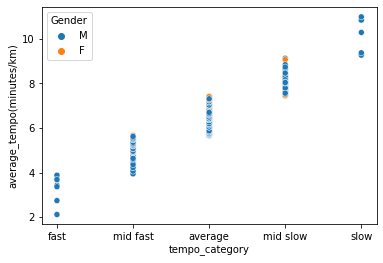

In [414]:
sns.scatterplot(x='tempo_category', y='average_tempo(minutes/km)', hue='Gender', data=bszm)

In [415]:
bszm.to_csv('/Users/csizi/Development/marathon_statistics/dataset/csv/bszm_2008_2020/bszm_cleaned.csv', sep=';', header=True, index=False)

<AxesSubplot:ylabel='Gender'>

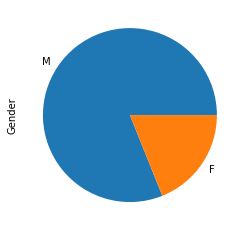

In [416]:
bszm['Gender'].value_counts().plot(kind='pie')

<AxesSubplot:ylabel='finished'>

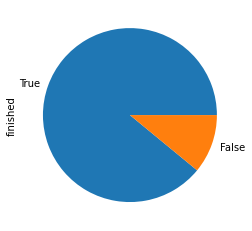

In [417]:
bszm['finished'].value_counts().plot(kind='pie')

<AxesSubplot:xlabel='age', ylabel='Ran km'>

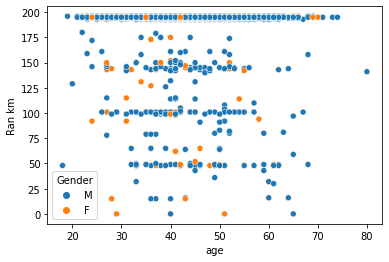

In [418]:
sns.scatterplot(x='age', y='Ran km', hue='Gender', data=bszm)

<AxesSubplot:xlabel='average_tempo(minutes/km)', ylabel='age'>

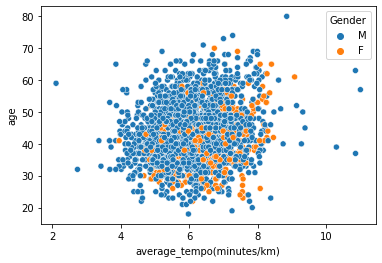

In [419]:
sns.scatterplot(x='average_tempo(minutes/km)', y='age', hue='Gender', data=bszm)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  


<AxesSubplot:xlabel='average_tempo(minutes/km)', ylabel='Density'>

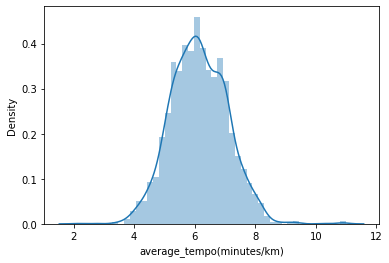

In [420]:
sns.distplot(bszm['average_tempo(minutes/km)'])